In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Plotting figures of Sec. V.B (Perturbing a Kerr BH with a Teukolsky wave) in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
import sys

pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 1.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

# Plotting waveform quantities at future null infinity

Reproducing Fig. 9 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [3]:
def loaddata(name,time):
    data = np.loadtxt(name+'.dat')
    data_interp = interp1d(data[:,0], data[:,1])(time)
    return data_interp

def get_plot_range(name):
    if name=='News':
        title_name='$N_{l=2,m=0}$'
        ymin=1e-7
        ymax=1e-2
    elif name=='Strain':
        title_name='$h_{l=2,m=0}$'
        ymin=1e-6
        ymax=1e-1
    elif name=='Psi4':
        title_name='$\psi_{4}^{(l=2,m=0)}$'
        ymin=1e-10
        ymax=1e-2
    elif name=='Psi3':
        title_name='$\psi_{3}^{(l=2,m=0)}$'
        ymin=1e-7
        ymax=2e-2
    elif name=='Psi2':
        title_name='$\psi_{2}^{(l=2,m=0)}$'
        ymin=1e-5
        ymax=1e-1
    elif name=='Psi1':
        title_name='$\psi_{1}^{(l=2,m=0)}$'
        ymin=1e-4
        ymax=1e1
    elif name=='Psi0':
        title_name='$\psi_{0}^{(l=2,m=0)}$'
        ymin=1e-2
        ymax=1e4
        
    return title_name, ymin, ymax

## $\psi_4$

In [4]:
name = 'Psi4'
maxtime = 350
time = np.arange(0,maxtime,0.05)

cce366_int = loaddata('366cce/'+name,time)
cce377_int = loaddata('377cce/'+name,time)

ccm366_int = loaddata('366ccm/'+name,time)
ccm377_int = loaddata('377ccm/'+name,time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

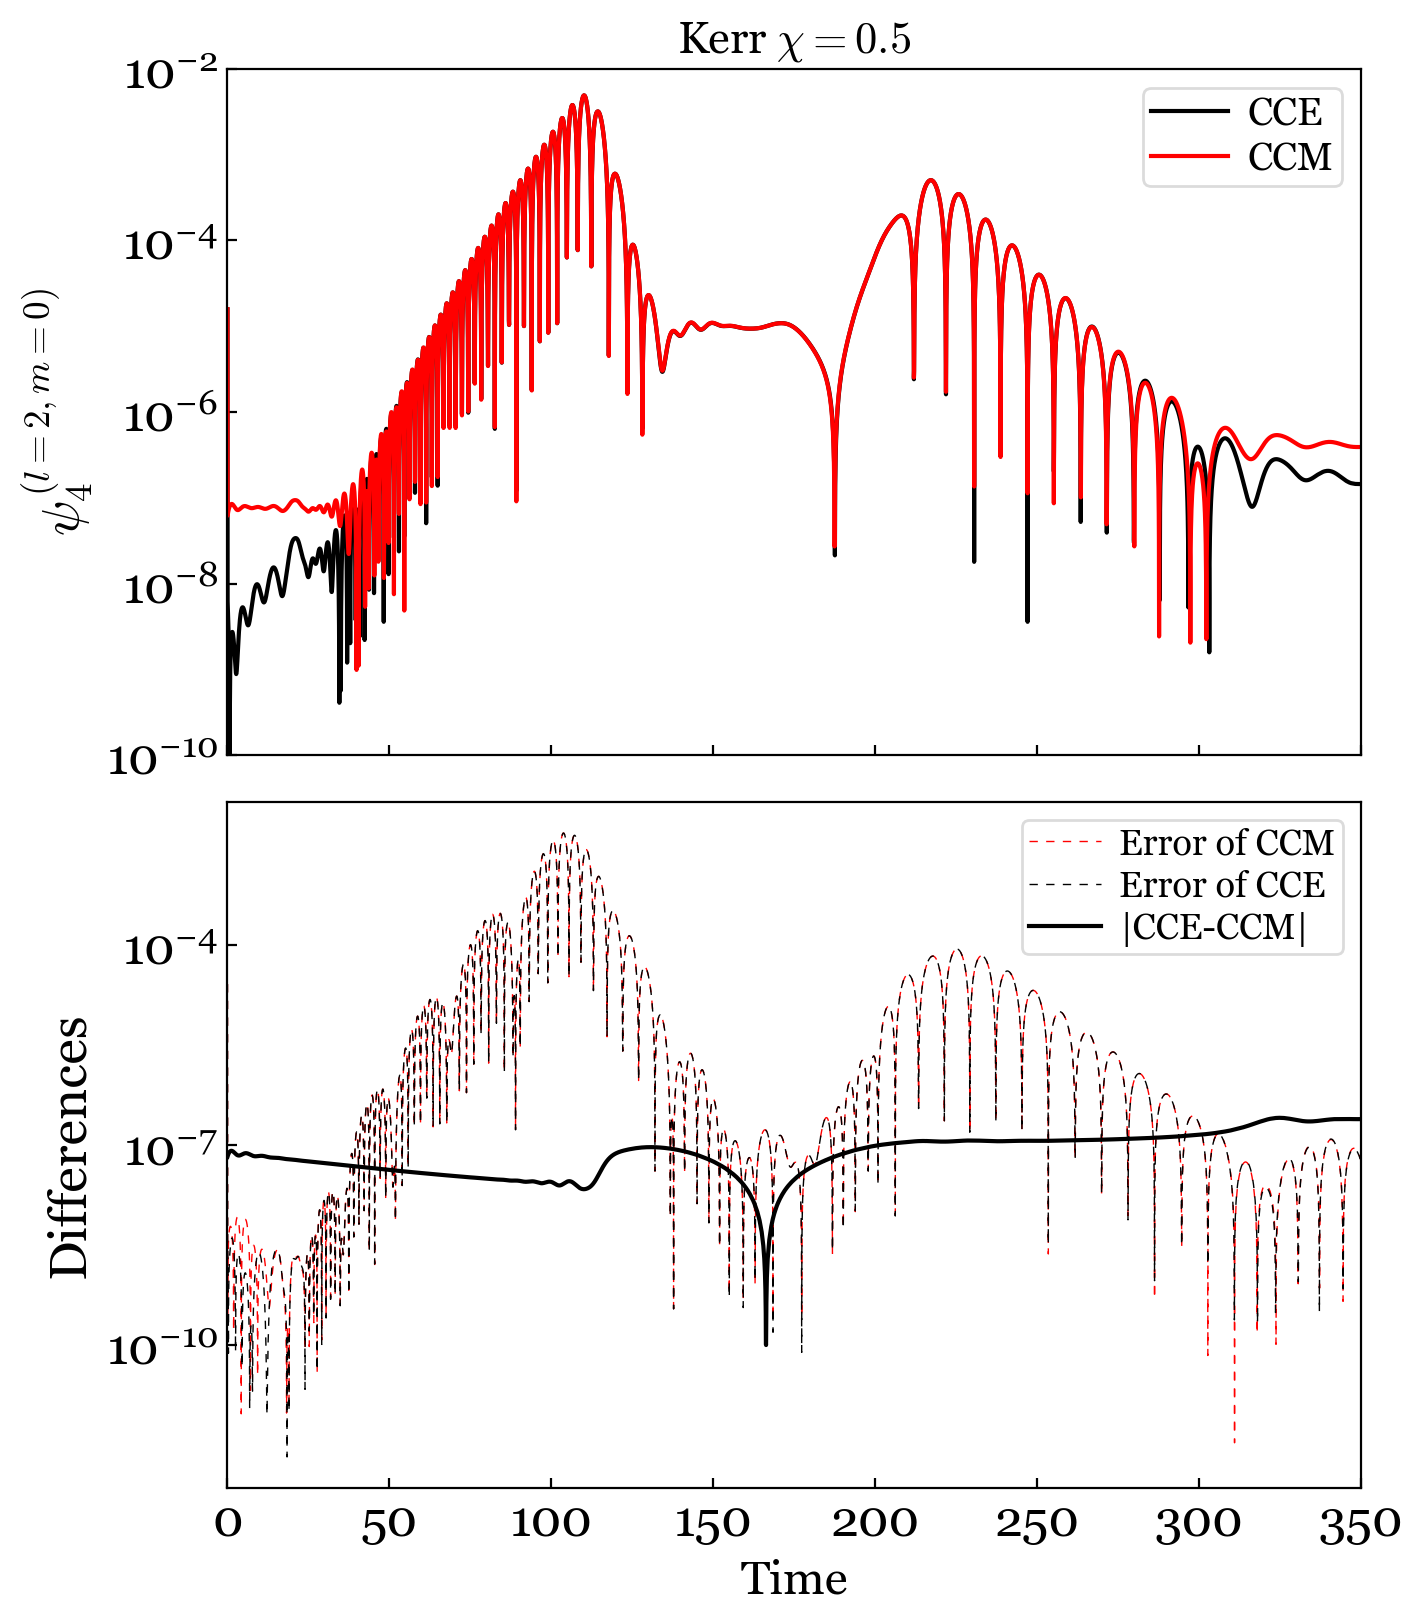

In [5]:
fig,ax = pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize = 14)
ax[0].set_ylim(ymin, ymax)
ax[0].set_title(r'Kerr $\chi=0.5$', fontsize = 16)
ax[0].set_ylabel(title_name, fontsize = 19)

ax[1].semilogy(time,abs(ccm377_int-ccm366_int), label='Error of CCM',\
               ls='--', color='r', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time,abs(cce366_int-cce377_int), label='Error of CCE',\
               ls='--', color='k', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time,abs(cce377_int-ccm377_int), label='|CCE-CCM|',\
               color='k', lw=1.5)
ax[1].legend(ncol=1,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10, numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10, numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

# GH constraints

Reproducing Fig. 8 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [6]:
constrain355ccm=np.loadtxt('355ccm/Norms.dat')
constrain366ccm=np.loadtxt('366ccm/Norms.dat')
constrain377ccm=np.loadtxt('377ccm/Norms.dat')

/var/folders/_h/wn4r4b915954xqlh974cy17c0000gn/T/ipykernel_98035/3342975443.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  pl.subplots_adjust(hspace=0.02)


(0.0, 350.0)

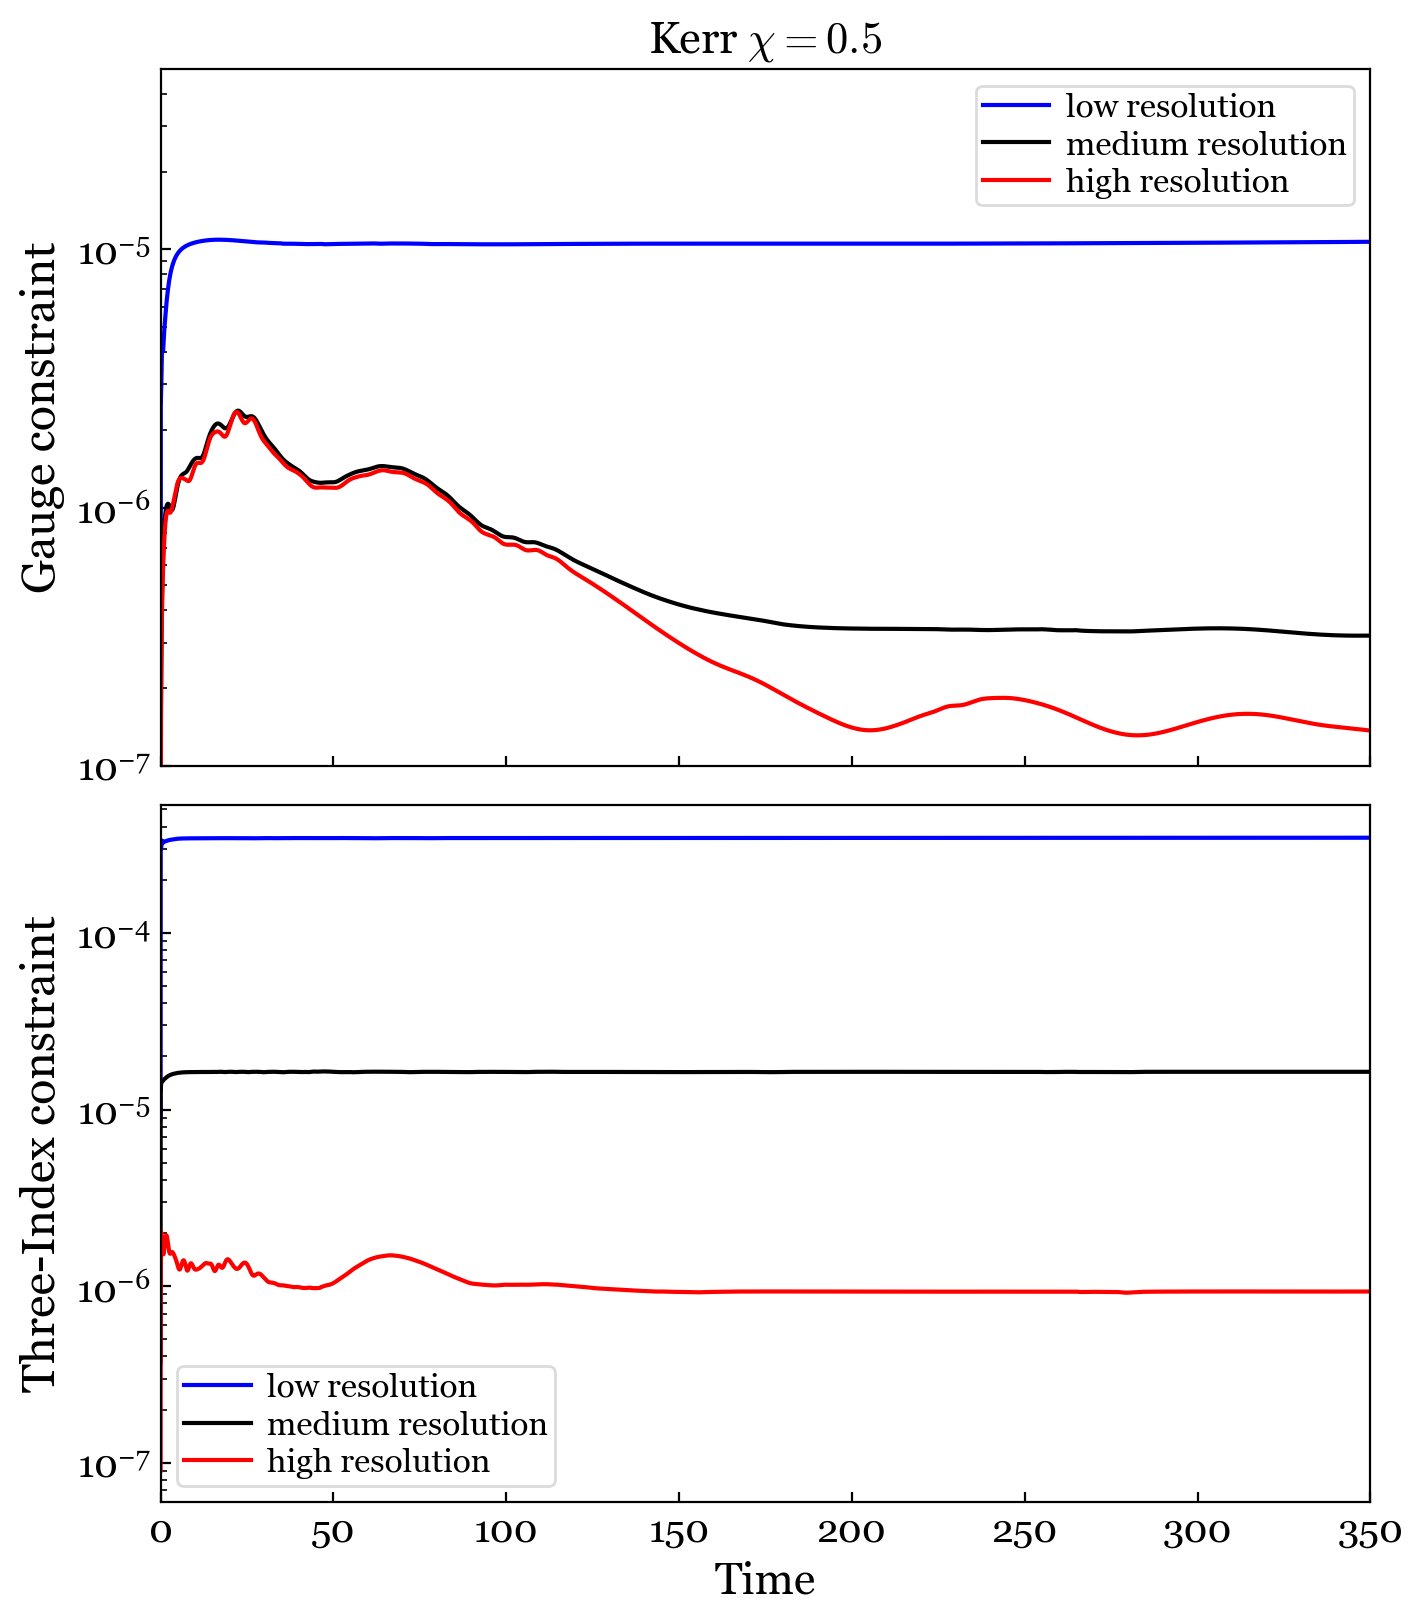

In [7]:
fig, ax=pl.subplots(2, 1, figsize=(7,8), constrained_layout=True, sharex=True)
pl.subplots_adjust(hspace=0.02)

indd=4
ax[0].semilogy(constrain355ccm[:,0], constrain355ccm[:,indd],\
               'b', label='low resolution')
ax[0].semilogy(constrain366ccm[:,0],constrain366ccm[:,indd],\
               'k', label='medium resolution')
ax[0].semilogy(constrain377ccm[:,0],constrain377ccm[:,indd],\
               'r', label='high resolution')
ax[0].set_ylabel('Gauge constraint')
ax[0].set_ylim(1e-7, 5e-5)
ax[0].set_title(r'Kerr $\chi=0.5$', fontsize=16)
ax[0].legend()

indd=5
ax[1].semilogy(constrain355ccm[:,0], constrain355ccm[:,indd],\
               'b', label='low resolution')
ax[1].semilogy(constrain366ccm[:,0], constrain366ccm[:,indd],\
               'k', label='medium resolution')
ax[1].semilogy(constrain377ccm[:,0], constrain377ccm[:,indd],\
               'r', label='high resolution')
ax[1].set_ylabel('Three-Index constraint')
ax[1].legend()
ax[1].set_xlabel('Time', fontsize=16)
ax[1].set_xlim(0, maxtime)